In [329]:
import pandas as pd
import numpy as np

### Read in the dataset 

In [330]:
filename = "dataset/fetch_california_housing.xlsx"
df = pd.read_excel(filename)

#### the first 5 rows of the dataset

In [331]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127   1.023810         322  2.555556     37.88   
1  8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
2  7.2574        52  8.288136   1.073446         496  2.802260     37.85   
3  5.6431        52  5.817352   1.073059         558  2.547945     37.85   
4  3.8462        52  6.281853   1.081081         565  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

### null value check

In [332]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

### Feature values set X and target set Y

In [333]:
X = df.values[:, :-1]
y = df.values[:, -1]

### Standardization

In [334]:
from sklearn.preprocessing import StandardScaler

In [335]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


### Test set and Train set

In [336]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [337]:
print((y_train))
print("Length: ",len(y_train))

[2.285 2.799 1.83  ... 2.221 2.835 3.25 ]
Length:  15480


### Batch Gradient Descent implement

In [338]:
def batch_gradient_descent(X, y, weights, learning_rate, epochs):

    m = len(y)  # Number of samples
    for epoch in range(epochs):
        gradients = (2/m) * X.T.dot(X.dot(weights) - y)
        weights -= learning_rate * gradients

    return weights

Add bias to train and test set

In [339]:
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

### Find the optimal weight for X_train

In [340]:
weights = np.zeros(X_train.shape[1]) 
optimized_weights = batch_gradient_descent(X_train, y_train, weights, learning_rate=0.01, epochs=1000)

### **Predictions**

In [341]:
y_pred = X_test.dot(optimized_weights)  # Predictions

In [342]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2)
print(mse)

0.591734151784004
0.5402247619771164


In [343]:
print(y_pred)

[0.8032586  1.71065617 2.61946327 ... 1.6852725  2.48313589 3.50446597]


In [344]:
import matplotlib.pyplot as plt

### Plot the value of MSE and R2

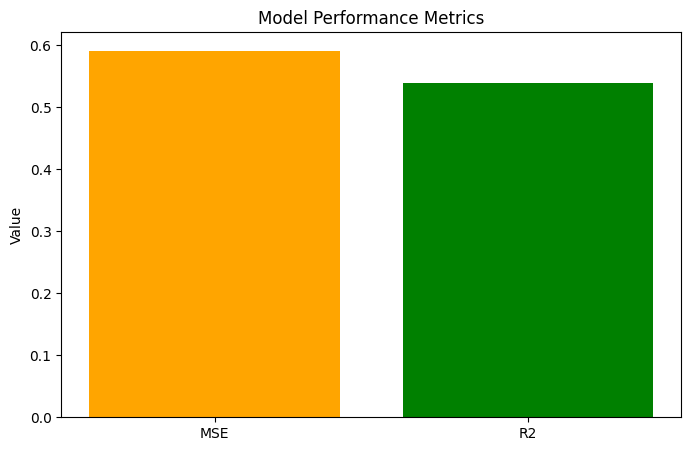

In [345]:
plt.figure(figsize=(8, 5))
plt.bar(['MSE', 'R2'], [r2, mse], color=['orange', 'green'])
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.show()